#분석(최종)




==============================================

평균 노쇼 비율은 20.19%

==============================================

day difference와 노쇼 비율의 시각화 -> 진료일과 예약일의 차가 음수값, 표본이 부족하여 튀는 데이터들을 거를 필요가 있음.

진료는 0 ~ 25일 사이가 가장 많음 -> day difference를 0부터 25로 제한

예약일과 진료일의 편차가 클수록 노쇼 비율이 올라감을 확인.

SNS 수신을 받은 사람은 노쇼 비율이 줄어들까?
-> 해당 범위에서 SNS 수신을 받은 사람의 노쇼 비율이 낮음.

**결론 : day difference에 따라 노쇼 비율이 증가하며 SNS 수신이 노쇼 해소에 도움이 될 수 있음**

==============================================

환자들이 가장 많이 방문하는 시간은 7시와 8시

그러나 해당 시간에 낮은 노쇼 비율을 보였으며, 특히 7시에는 가장 많은 사람이 몰렸으나 가장 적은 노쇼 비율을 보임.

해결방안은?

해당 7~8시 환자 수용을 늘리거나 주말에 해당 시간의 진료 일정을 확충해야 함.

**결론 : 환자가 가장 선호하는 시간에 노쇼 비율이 가장 낮으며 해당 시간의 진료를 확대해야 함.**

==============================================

환자가 가장 많은 상위 10개의 도시를 선택.

도시별 노쇼 비율 중 2개의 도시(JARDIM DA PENHA, SANTA MARTHA)가 표본이 적은 도시들을 제외하면 가장 적은 노쇼 비율을 가짐.

해당 데이터셋의 데이터들을 토대로 비교를 해보았지만 두 도시만의 두드러지는 요인을 찾지 못하였음.

데이터셋 속 데이터가 아닌 다른 외부 요인들이 해당 지역들의 낮은 노쇼 비율에 관여했을 것이라고 판단.

==============================================



#1.라이브러리 호출

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#2.데이터프레임 불러오기

In [3]:
# 파일 경로 수정
df = pd.read_csv('/Users/ansejun/Desktop/git/데이터분석/의료데이터 분석 경진대회/KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#3.데이터 전처리

##3-1.예약일과 진료일의 차이 계산

In [4]:
# datetime 타입으로 변환
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# 날짜 차이 계산
df['DaysDifference'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

##3-2.요일 추가

In [5]:
df['ScheduledDay_Weekday'] = df['ScheduledDay'].dt.day_name()
df['AppointmentDay_Weekday'] = df['AppointmentDay'].dt.day_name()

##3-3.시간 추가

In [19]:
df['ScheduledHour'] = df['ScheduledDay'].dt.hour

In [20]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DaysDifference,ScheduledDay_Weekday,AppointmentDay_Weekday,ScheduledHour
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,34,Tuesday,Tuesday,9
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,34,Tuesday,Tuesday,7
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,40,Wednesday,Tuesday,16
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,40,Wednesday,Tuesday,15
110526,3.775115e+14,5629448,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,No,40,Wednesday,Tuesday,13


#4.데이터 분석

##4-1.예약기간 차이가 노쇼에 끼치는 영향

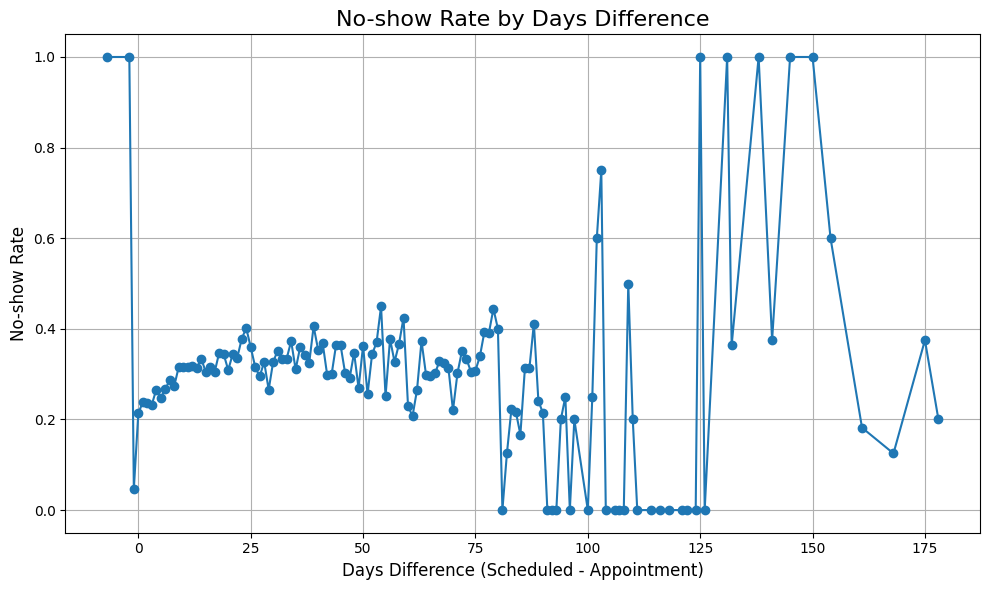

In [7]:
# Group by DaysDifference and calculate No-show rate
days_difference_analysis = df.groupby('DaysDifference')['No-show'].apply(lambda x: (x == 'Yes').mean()).reset_index()

# Plot the analysis
plt.figure(figsize=(10, 6))
plt.plot(days_difference_analysis['DaysDifference'], days_difference_analysis['No-show'], marker='o')
plt.title('No-show Rate by Days Difference', fontsize=16)
plt.xlabel('Days Difference (Scheduled - Appointment)', fontsize=12)
plt.ylabel('No-show Rate', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

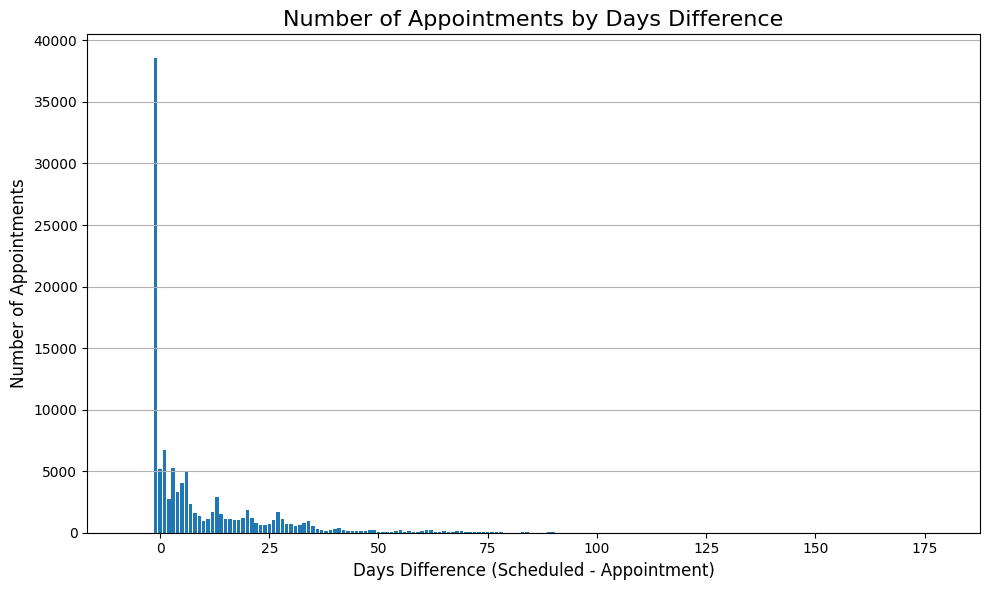

In [8]:
# Count the number of appointments for each DaysDifference
days_difference_count = df['DaysDifference'].value_counts().reset_index()
days_difference_count.columns = ['DaysDifference', 'Count']
days_difference_count = days_difference_count.sort_values('DaysDifference')

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(days_difference_count['DaysDifference'], days_difference_count['Count'])
plt.title('Number of Appointments by Days Difference', fontsize=16)
plt.xlabel('Days Difference (Scheduled - Appointment)', fontsize=12)
plt.ylabel('Number of Appointments', fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


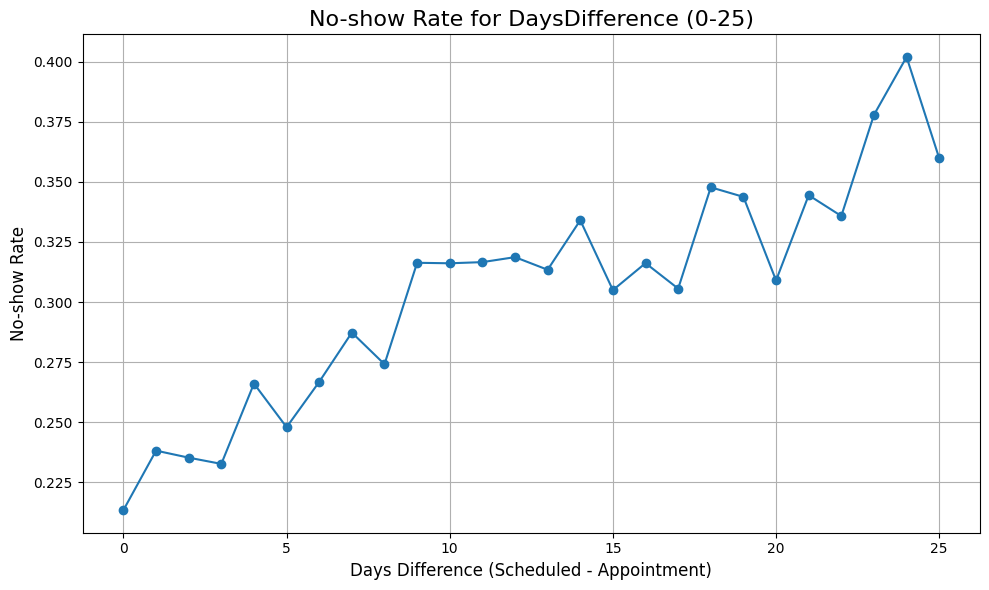

In [9]:
import matplotlib.pyplot as plt

# Filter data for DaysDifference between 0 and 25
filtered_data = df[(df['DaysDifference'] >= 0) & (df['DaysDifference'] <= 25)]

# Calculate the no-show rate for each DaysDifference
noshow_rate_filtered = filtered_data.groupby('DaysDifference')['No-show'].apply(lambda x: (x == 'Yes').mean()).reset_index()

# Plot the no-show rate
plt.figure(figsize=(10, 6))
plt.plot(noshow_rate_filtered['DaysDifference'], noshow_rate_filtered['No-show'], marker='o')
plt.title('No-show Rate for DaysDifference (0-25)', fontsize=16)
plt.xlabel('Days Difference (Scheduled - Appointment)', fontsize=12)
plt.ylabel('No-show Rate', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


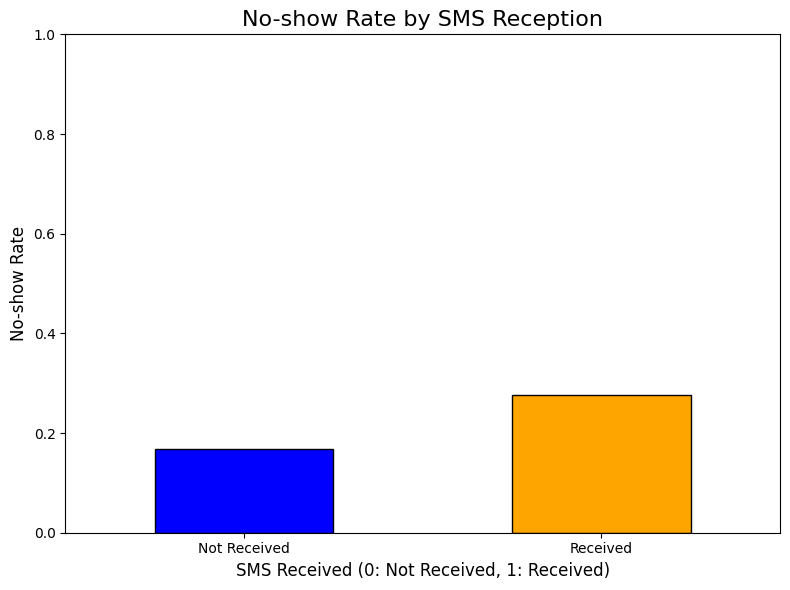

In [10]:
# Calculate the no-show rate for SMS received and not received
sms_noshow_rate = df.groupby('SMS_received')['No-show'].apply(lambda x: (x == 'Yes').mean())

# Plot the no-show rates for both groups
plt.figure(figsize=(8, 6))
sms_noshow_rate.plot(kind='bar', color=['blue', 'orange'], edgecolor='black')
plt.title('No-show Rate by SMS Reception', fontsize=16)
plt.xlabel('SMS Received (0: Not Received, 1: Received)', fontsize=12)
plt.ylabel('No-show Rate', fontsize=12)
plt.ylim(0, 1)  # Set y-axis to range [0, 1]
plt.xticks([0, 1], labels=['Not Received', 'Received'], rotation=0)
plt.tight_layout()
plt.show()

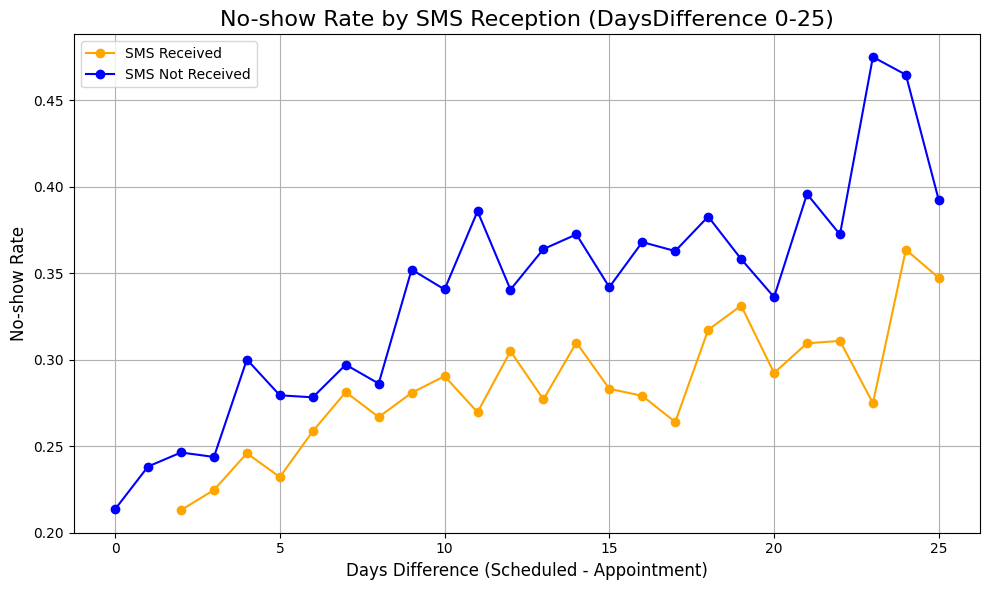

In [11]:
# Filter data for SMS_received = 1 and DaysDifference between 0 and 25
sms_filtered_data = df[(df['SMS_received'] == 1) & (df['DaysDifference'] >= 0) & (df['DaysDifference'] <= 25)]

# Calculate the no-show rate for each DaysDifference for SMS received
sms_noshow_rate_filtered = sms_filtered_data.groupby('DaysDifference')['No-show'].apply(lambda x: (x == 'Yes').mean()).reset_index()

# Filter data for SMS_received = 0 and DaysDifference between 0 and 25
no_sms_filtered_data = df[(df['SMS_received'] == 0) & (df['DaysDifference'] >= 0) & (df['DaysDifference'] <= 25)]

# Calculate the no-show rate for each DaysDifference for SMS not received
no_sms_noshow_rate_filtered = no_sms_filtered_data.groupby('DaysDifference')['No-show'].apply(lambda x: (x == 'Yes').mean()).reset_index()

# Plot the no-show rates for both groups
plt.figure(figsize=(10, 6))

# Plot for SMS received
plt.plot(sms_noshow_rate_filtered['DaysDifference'], sms_noshow_rate_filtered['No-show'], marker='o', color='orange', label='SMS Received')

# Plot for SMS not received
plt.plot(no_sms_noshow_rate_filtered['DaysDifference'], no_sms_noshow_rate_filtered['No-show'], marker='o', color='blue', label='SMS Not Received')

# Add title, labels, and legend
plt.title('No-show Rate by SMS Reception (DaysDifference 0-25)', fontsize=16)
plt.xlabel('Days Difference (Scheduled - Appointment)', fontsize=12)
plt.ylabel('No-show Rate', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


##4-2.진료시간이 노쇼에 끼치는 영향

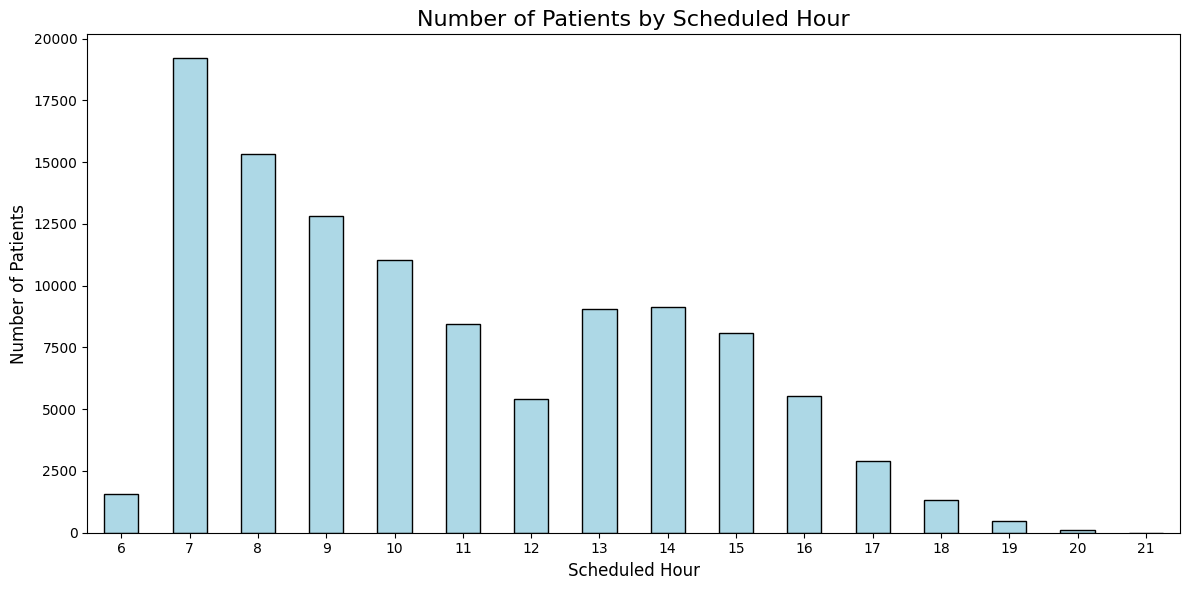

In [21]:
# Count the number of patients by hour of the day
hourly_patient_count = df['ScheduledHour'].value_counts().sort_index()

# Plot the patient count by hour
plt.figure(figsize=(12, 6))
hourly_patient_count.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Number of Patients by Scheduled Hour', fontsize=16)
plt.xlabel('Scheduled Hour', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

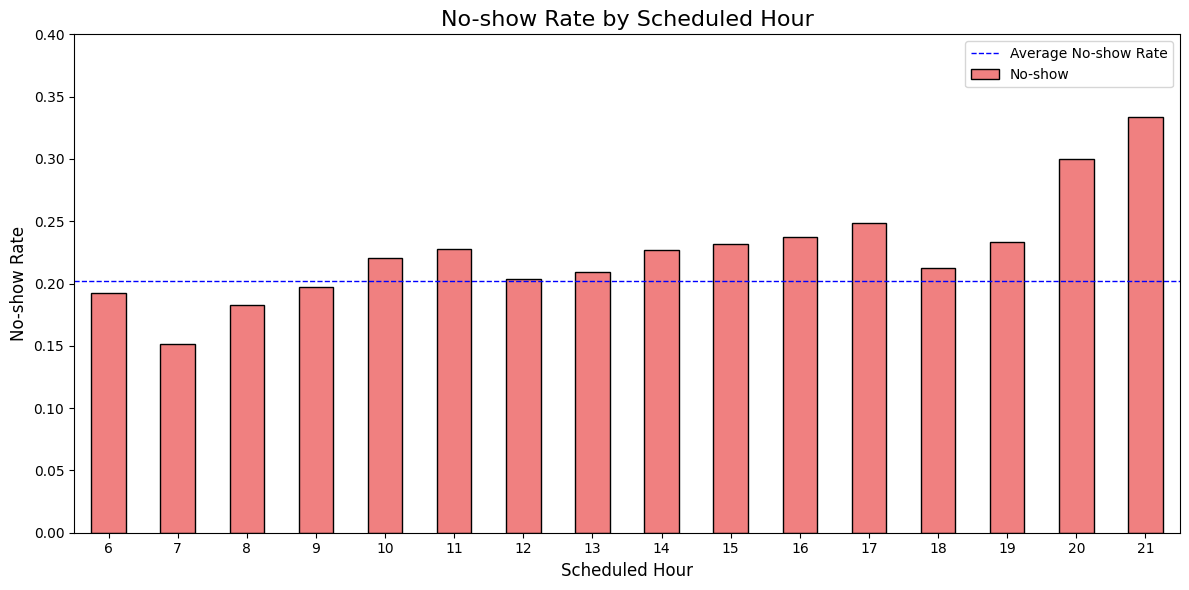

In [22]:
# Calculate no-show rate by hour of the day
hourly_noshow_rate = df.groupby('ScheduledHour')['No-show'].apply(lambda x: (x == 'Yes').mean())

# Plot the no-show rate by hour
plt.figure(figsize=(12, 6))
hourly_noshow_rate.plot(kind='bar', color='lightcoral', edgecolor='black')

# Add a horizontal line at y = 0.2019
plt.axhline(y=0.2019, color='blue', linestyle='--', linewidth=1, label='Average No-show Rate')

# Add title and labels
plt.title('No-show Rate by Scheduled Hour', fontsize=16)
plt.xlabel('Scheduled Hour', fontsize=12)
plt.ylabel('No-show Rate', fontsize=12)
plt.ylim(0, 0.4)  # Set y-axis to range [0, 0.4]
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()


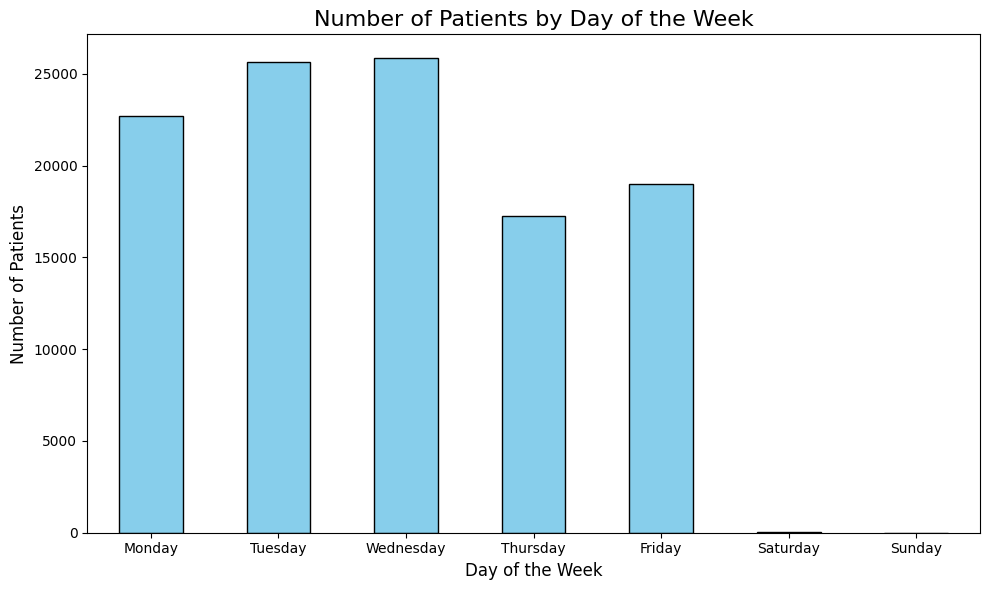

In [24]:
# Count the number of patients for each day of the week
weekday_patient_count = df['AppointmentDay_Weekday'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plot the patient count by day of the week
plt.figure(figsize=(10, 6))
weekday_patient_count.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Patients by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


##4-3.노쇼 모범도시 선정!

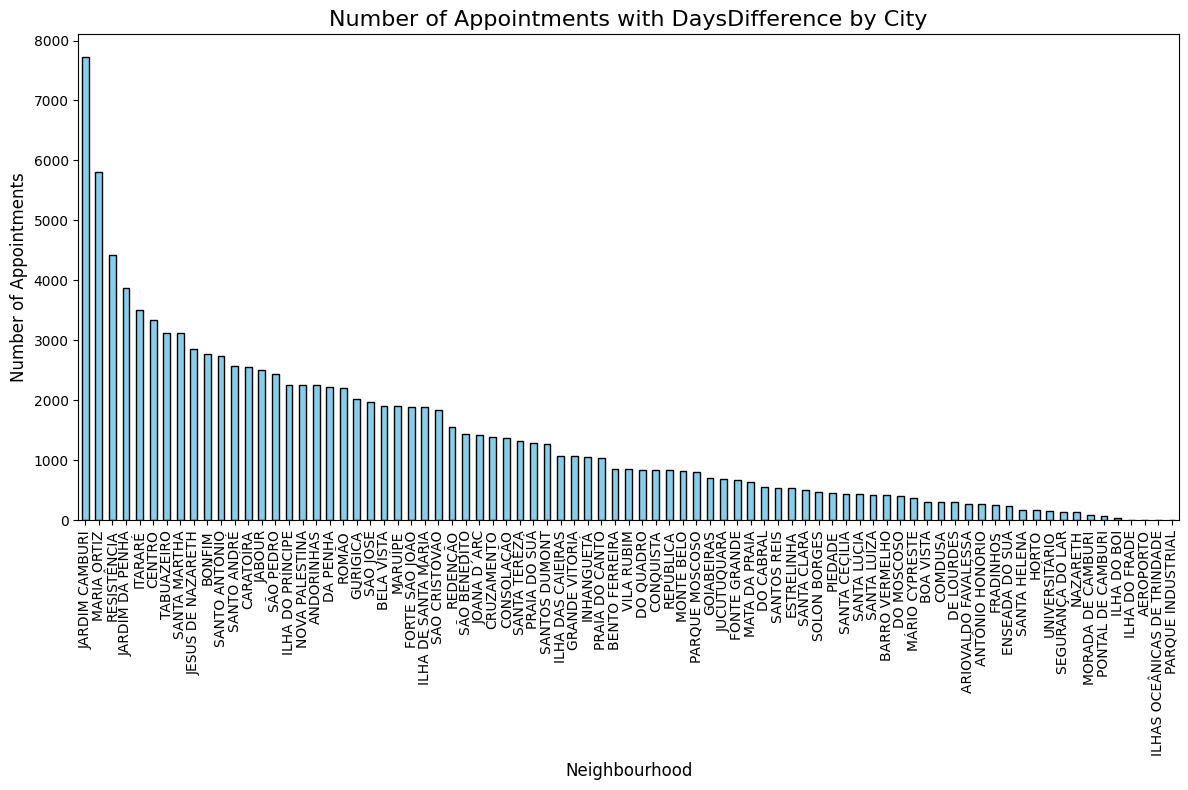

In [25]:
# Count the number of such cases for each neighbourhood
day_difference_counts = df['Neighbourhood'].value_counts()

# Plot the data
plt.figure(figsize=(12, 8))
day_difference_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Appointments with DaysDifference by City', fontsize=16)
plt.xlabel('Neighbourhood', fontsize=12)
plt.ylabel('Number of Appointments', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

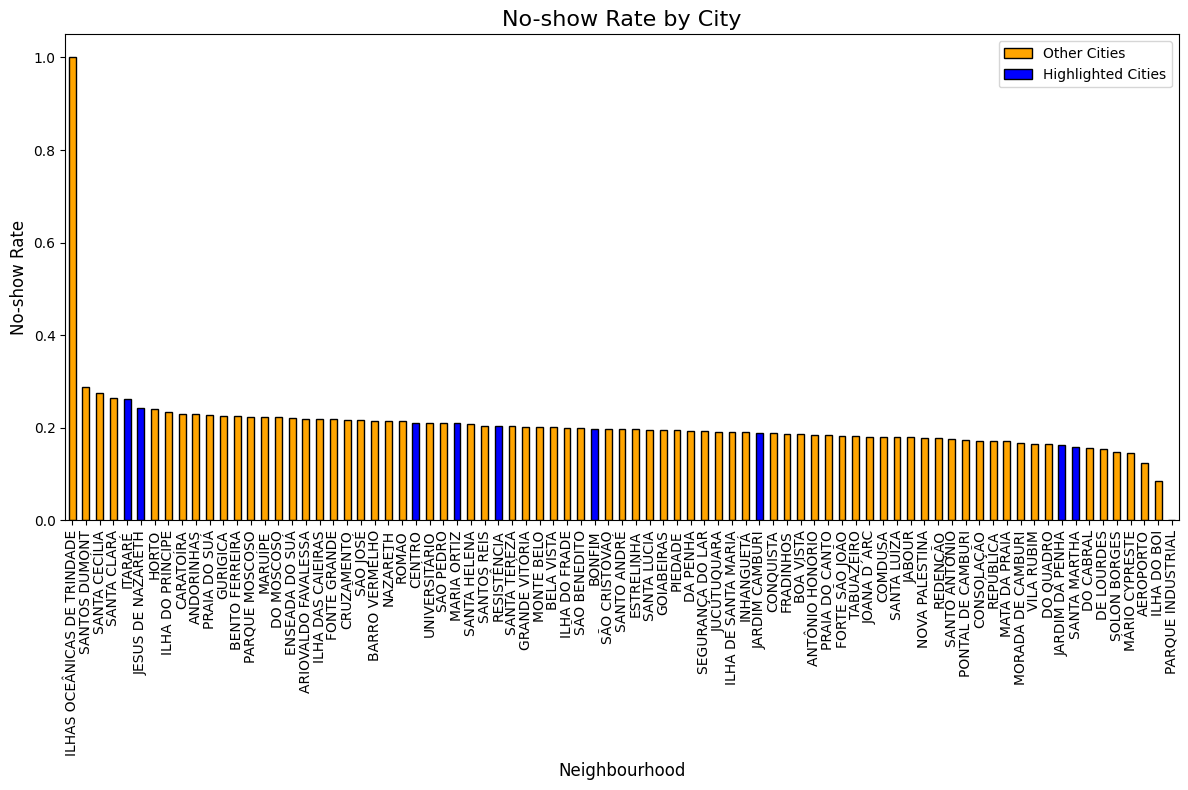

In [26]:
# Highlighted cities
highlighted_cities = ['JARDIM CAMBURI', 'MARIA ORTIZ', 'RESISTÊNCIA', 'JARDIM DA PENHA',
                      'ITARARÉ', 'CENTRO','SANTA MARTHA', 'JESUS DE NAZARETH', 'BONFIM']

# Calculate no-show rate for each neighbourhood
city_noshow_data = df.groupby(['Neighbourhood', 'No-show']).size().unstack(fill_value=0)
city_noshow_data['No-show Rate'] = city_noshow_data['Yes'] / city_noshow_data.sum(axis=1)

# Sort data by no-show rate
city_noshow_sorted = city_noshow_data['No-show Rate'].sort_values(ascending=False)

# Create colors: highlight specific cities
colors = ['orange' if city not in highlighted_cities else 'blue' for city in city_noshow_sorted.index]

# Plot no-show rate by city
plt.figure(figsize=(12, 8))
city_noshow_sorted.plot(kind='bar', color=colors, edgecolor='black')

# Add title, labels, and legend
plt.title('No-show Rate by City', fontsize=16)
plt.xlabel('Neighbourhood', fontsize=12)
plt.ylabel('No-show Rate', fontsize=12)
plt.xticks(rotation=90)

# Add legend for highlighted cities
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='orange', edgecolor='black', label='Other Cities'),
    Patch(facecolor='blue', edgecolor='black', label='Highlighted Cities')
]
plt.legend(handles=legend_elements, loc='upper right')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


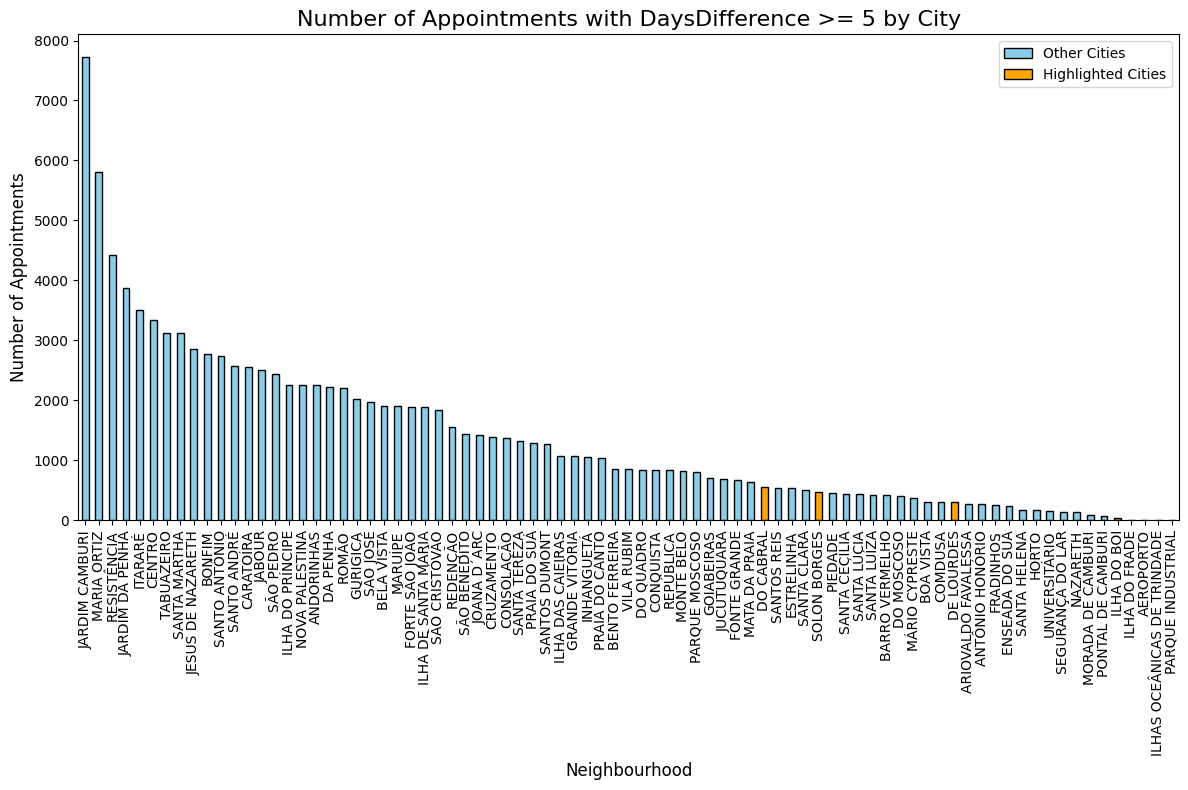

In [27]:
# Highlighted neighbourhoods
highlighted_neighbourhoods = [
    'DO CABRAL', 'DE LOURDES', 'SOLON BORGES',
    'MARIO CYPRESTE', 'AEROPORTO', 'ILHA DO BOI', 'PARQUE INDUSTRIAL'
]

# Count the number of such cases for each neighbourhood
day_difference_counts = df['Neighbourhood'].value_counts()

# Create colors: highlight specific neighbourhoods
colors = ['skyblue' if city not in highlighted_neighbourhoods else 'orange' for city in day_difference_counts.index]

# Plot the data
plt.figure(figsize=(12, 8))
day_difference_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Number of Appointments with DaysDifference >= 5 by City', fontsize=16)
plt.xlabel('Neighbourhood', fontsize=12)
plt.ylabel('Number of Appointments', fontsize=12)
plt.xticks(rotation=90)

# Add legend for highlighted neighbourhoods
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='skyblue', edgecolor='black', label='Other Cities'),
    Patch(facecolor='orange', edgecolor='black', label='Highlighted Cities')
]
plt.legend(handles=legend_elements, loc='upper right')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


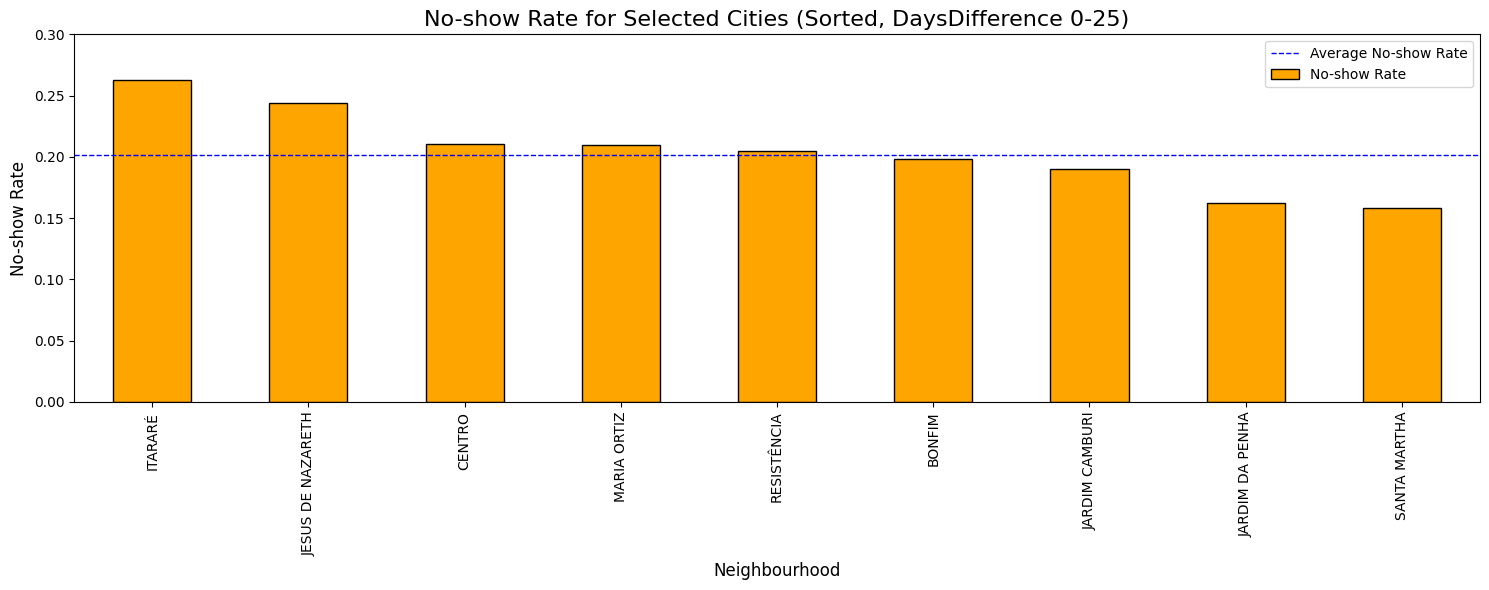

In [28]:
# Filter data for the selected cities and DaysDifference between 0 and 25
filtered_data = df[
    (df['Neighbourhood'].isin(['JARDIM CAMBURI', 'MARIA ORTIZ', 'RESISTÊNCIA', 'JARDIM DA PENHA',
                      'ITARARÉ', 'CENTRO','SANTA MARTHA', 'JESUS DE NAZARETH', 'BONFIM']))
]

# Calculate the no-show rate for each city within the range
city_noshow_rate_filtered = (
    filtered_data.groupby(['Neighbourhood', 'No-show'])
    .size()
    .unstack(fill_value=0)
)
city_noshow_rate_filtered['No-show Rate'] = (
    city_noshow_rate_filtered['Yes'] / city_noshow_rate_filtered.sum(axis=1)
)

# Sort the no-show rates in descending order
city_noshow_rate_sorted = city_noshow_rate_filtered['No-show Rate'].sort_values(ascending=False)

# Plot the sorted no-show rates for the selected cities
plt.figure(figsize=(15, 6))
city_noshow_rate_sorted.plot(kind='bar', color='orange', edgecolor='black')

# Add a horizontal line at y = 0.2019
plt.axhline(y=0.2019, color='blue', linestyle='--', linewidth=1, label='Average No-show Rate')

# Add title, labels, and legend
plt.title('No-show Rate for Selected Cities (Sorted, DaysDifference 0-25)', fontsize=16)
plt.xlabel('Neighbourhood', fontsize=12)
plt.ylabel('No-show Rate', fontsize=12)
plt.ylim(0, 0.3)  # Set consistent y-axis scale
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()
